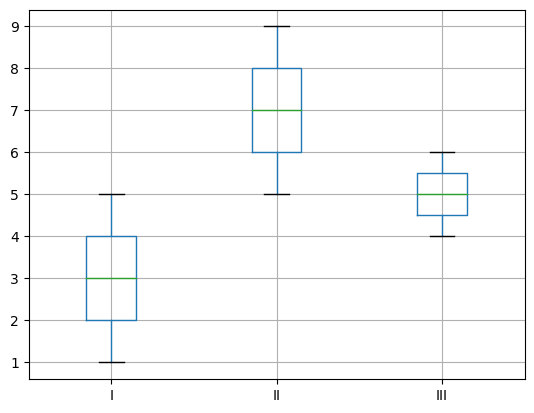

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)
data = pd.read_csv('simplest.csv')

data.boxplot(column=['I', 'II', 'III'])
plt.show()

https://www.statology.org/anova-f-value-p-value/

ANOVA 1way
https://www.youtube.com/watch?v=9cnSWads6oo



# ANOVA
Analysis of Variance o Analisis de la Varianza

Es una coleccion de modelos y procedimientos para analizar la varianza entre grupos, se utiliza en diseño de experiemntos y al medir si un efecto es significativo entre varios grupos,

especificamente trataremos con la 1-way ANOVA, la cual es una tabla que se ve asi:
Aqui una imagen de wikipedia:
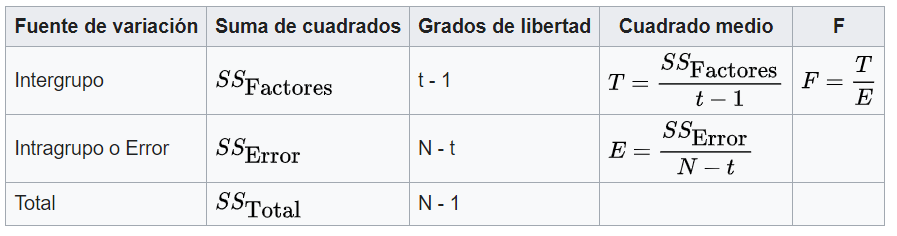

es importante saber que asume:
- que los datos son independientes y no dependen entre si
- que los datos provienen de una distribucion normal
- que los errores de cada grupo poseen igual varianza y se comportan normales

Notacion:
- $X_c^i$ es la muestra $i$ del grupo $c$ 
- $\bar X_c$ es la media del grupo $c$
- $c$ es la cantidad de grupos
- $n_c$ es la cantidad de muestras del grupo c
- $\bar{\bar X}$ es la media de las medias de los grupos


SSE es lo que obtenemos de cada grupo; en algunos lados SSW por within (ingles para dentro del grupo)
$$
\text{SSE} = \sum_{c,i} (X_c^i -\bar{ X_c})^2 = \sum_c \text{SSE}_c
$$


SSF o SSB es el que es entre grupos (between, ingles para entre los grupos) llamado a veces factores.
$$
\text{SSB} = \sum_{c,i} (\bar X_c - \bar{\bar X})^2=\sum_c \text{SSB}_c =\sum_c n_c (\bar X_c - \bar{\bar X})^2 
$$

calculemos estos para una serie de datos

In [7]:
data

,I,II,III
0,1,5,4
1,3,7,5
2,5,9,6


In [47]:
X = data.values # X[i, c] i sample, c grupo

mean_I = data['I'].mean()
mean_II = data['II'].mean()
mean_III = data['III'].mean()
# aqui van todas las medias
X_c = np.array([mean_I, mean_II, mean_III])

TotalMean = np.mean(X_c) # x bar bar


print(X_c)
print(TotalMean)

[3. 7. 5.]
5.0


### SSE Sum Squared Errors
Es la diferencia que tiene cada grupo de datos con respecto a la media de grupo,
nos habla de la dispersion dentro de un grupo

In [33]:
SSE_c = np.zeros(len(X_c))

for c in range(len(X_c)):
    print(f"grupo {c+1}")
    for i in range(len(X)):
        print(f"({X[i, c]} - {X_c[c]})**2 = ",(X[i, c] - X_c[c])**2)
        SSE_c[c] += (X[i, c] - X_c[c])**2
    print(f"SSE_{c+1} = ", SSE_c[c])
    
print("Total")
SSE = np.sum(SSE_c)
print("SSE = ", SSE)

grupo 1
(1 - 3.0)**2 =  4.0
(3 - 3.0)**2 =  0.0
(5 - 3.0)**2 =  4.0
SSE_1 =  8.0
grupo 2
(5 - 7.0)**2 =  4.0
(7 - 7.0)**2 =  0.0
(9 - 7.0)**2 =  4.0
SSE_2 =  8.0
grupo 3
(4 - 5.0)**2 =  1.0
(5 - 5.0)**2 =  0.0
(6 - 5.0)**2 =  1.0
SSE_3 =  2.0
Total
SSE =  18.0


In [46]:
# numpy hace lo mismo, suma todas las dimensiones
SSE = np.sum((X - X_c)**2)
print(f"SSE = {SSE}")

SSE = 18.0


### SSB Sum Squared Between Groups
Es la diferencia de la media de cada grupo con respecto a la media de todos los grupos

In [51]:
SSB_c = np.zeros(len(X_c))

for c in range(len(X_c)):
    print(f"grupo {c+1}")
    print(f"{len(X)}*({X_c[c]} - {TotalMean})**2 = ",len(X)*(X_c[c] - TotalMean)**2)
    SSB_c[c] += len(X)*(X_c[c] - TotalMean)**2
    print(f"SSB_{c+1} = ", SSB_c[c])
    
print("Total")
SSB = np.sum(SSB_c)
print("SSB = ", SSB)

grupo 1
3*(3.0 - 5.0)**2 =  12.0
SSB_1 =  12.0
grupo 2
3*(7.0 - 5.0)**2 =  12.0
SSB_2 =  12.0
grupo 3
3*(5.0 - 5.0)**2 =  0.0
SSB_3 =  0.0
Total
SSB =  24.0


In [52]:
SSB = np.sum(len(X)*( X_c - TotalMean)**2) #numpy way
SSB

24.0

#### SST
Total sum of square errors
$$
\text{SST} = \sum_i (X^i - \bar{ \bar {X}})^2
$$

In [53]:
SST = np.sum((X - TotalMean)**2)

SST2 = SSB + SSE
print(f"SST = {SST}")
print(f"SST2 = {SST2}")

SST = 42.0
SST2 = 42.0


# MSE y MSB
Mean Square, Error y Between Groups
Se trata de dividir por los grados de libertad,

$$
MSE = \frac{SSE}{c(n-1)}
$$

$$
MSB = \frac{SSE}{c-1}
$$

In [54]:
MSE = SSE / (len(X_c)*(len(X) - 1))
print(f"MSE = {MSE}")
MSB = SSB / (len(X_c) - 1)
print(f"MSB = {MSB}")

MSE = 3.0
MSB = 12.0


# F
En el análisis de varianza (ANOVA), el estadístico F se utiliza para comparar las varianzas de dos o más grupos de datos. En otras palabras, el F mide la relación entre la varianza entre los grupos y la varianza dentro de los grupos. Si la varianza entre los grupos es significativamente mayor que la varianza dentro de los grupos, el valor de F será mayor, lo que indicará que hay diferencias significativas entre los grupos. Si el valor de F es pequeño, significa que las diferencias entre los grupos no son significativas y que las observaciones son similares.

Hemos de usar test de hipotesis:
$$ H_0 : \mu_I = \mu_{II} = \mu_{III} $$
$$ H_\alpha : \mu_I \neq \mu_{II}\neq \mu_{III} $$

In [60]:
# luego el F-test
F = MSB / MSE
print("F=",F)
df1= len(X_c) - 1
df2=len(X_c)*(len(X) - 1)
print("df numerator = ",df1)
print("df denominator = ",df2)

F= 4.0
df numerator =  2
df denominator =  6


ahora utilizaremos una tabla de F, en este caso una con $\alpha = 0.05$, que es similar al puntaje p, de  https://www.statology.org/f-distribution-table/

DF1 se refiere al numerador, y DF2 al denominador, osea buscaremos la columna de 2 y la fila de 6:

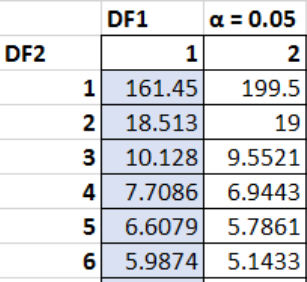

De acuerdo con la tabla F con $\alpha = 0.05$ y con DF1 = 2 y DF2 = 6, el valor crítico de F es 5.14325. Como el valor de F que calculaste fue menor que este valor crítico, no hay evidencia suficiente para rechazar la hipótesis nula de que las medias de las muestras son iguales. En otras palabras, no hay una diferencia significativa entre las medias de las muestras.

osea que nos quedamos con la hipotesis nula:
$$
 H_0 : \mu_I = \mu_{II} = \mu_{III} 
$$

#### uso de p-value
En el caso anterior indicamos la significancia y comparamos el $F$ con el valor critico, en este caso utilizamos el F obtenido y calculamos el area bajo la curva a la izquierda de nuestro valor F:



alternativamente proveen de una calculadora, que nos permite ingresar nuestro F y obtener el P-value, https://www.statology.org/f-distribution-calculator/

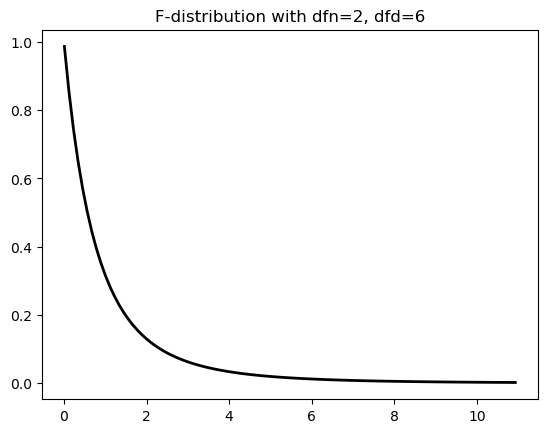

In [74]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

dfn, dfd = 2, 6
rv = f(dfn, dfd)
ax.plot(x, rv.pdf(x), 'k-', lw=2)
plt.title("F-distribution with dfn=2, dfd=6")
plt.show()

In [79]:
import scipy 

alpha = 0.05 #Or whatever you want your alpha to be.
areaizquierda = f.cdf(F, df1, df2)
print("probabilidad de que F sea menor que el valor observado = ",areaizquierda)

p_value = 1 - areaizquierda
print("Probabilidad de que F sea mayor que el valor observado = ",p_value)


probabilidad de que F sea menor que el valor observado =  0.9212827988338192
Probabilidad de que F sea mayor que el valor observado =  0.07871720116618075


El valor de `p_value` calculado en el código es la probabilidad de observar un valor de F mayor o igual al valor observado en los datos si la hipótesis nula de que las medias de los grupos son iguales es verdadera. 

Es decir, si el valor de `p_value` es menor que el nivel de significancia elegido (en este caso, alpha = 0.05), se rechaza la hipótesis nula y se concluye que existe una diferencia estadísticamente significativa entre al menos dos de los grupos. En cambio, si el valor de p_value es mayor que alpha, se falla en rechazar la hipótesis nula y no se puede afirmar con suficiente evidencia que existe una diferencia significativa entre los grupos

In [81]:
print("p_value: ",p_value)
print("alpha: ",alpha)
print("p_value < alpha = ",p_value < alpha)

if p_value < alpha:
    print("Rechazamos la hipotesis nula")
    print("Existe evidencia estadistica para afirmar que las medias de los grupos son diferentes")
else:
    print("No rechazamos la hipotesis nula")
    print("No existe evidencia estadistica para afirmar que las medias de los grupos son diferentes")


p_value:  0.07871720116618075
alpha:  0.05
p_value < alpha =  False
No rechazamos la hipotesis nula
No existe evidencia estadistica para afirmar que las medias de los grupos son diferentes


#### que sucede con p < 0.05 (rechazar hipotesis nula)

En caso de obtener un puntaje menor no tendriamos suficientes pruebas para aceptar la hipotesis alternativa que las medias son distintas, y deberiamos de pasar a test mas robustos

* Tukey Test
* Bonferroni Test
* Scheffe Test

Es incluso recomendado pues el test F depende mucho de que nuestros datos provengan de una distribución normal, de no ser así obtendriamos respuestas incorrectas que parecerian correctas.